## Task 3 - Hypothesis Testing

Repeat Task 3.2 after rescaling all features in the range [10, 15]. Use hypothesis testing to compare the performance of the models developed in this task with that developed in Tasks 3.2.

Markdown Question: What was the hypothesis you rejected in this task? How does p-value affect your decision?

<span style="font-weight:bold;">Save your response (program and markdown) as task3.ipynb</span>

## <b style="color: blue;">A visualization should have a goal/question/hypothesis. Clarify this!</b>

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from functions.pre_processing import *
from functions.transformations import *
from functions.feature_selection import *
from functions.analysis import *
from functions.model import *
from functions.classifiers import *
from functions.evaluation import *
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import ttest_rel, ttest_ind
# A visualization should have a goal/question/hypothesis. Clarify this!

-----
## Pre-Processing and Transformation

In [2]:
x_train, x_test, y_train, y_test = fetch_datasets()
x_train_norm, x_test_norm = normalise_min_max_task_3(x_train, x_test)

---
## MLP Classifier Training
Can see from the model's performance that there is clear overfitting occuring on recaling to [10,15]

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
mlp_training_results = mlp_classifier(x_train_norm, x_test_norm, y_train, y_test)
save_model(mlp_training_results, "models/task3/mlp_results")

------ Holdout Validation ------
Training Accuracy: 0.8883950617283951
Testing Accuracy: 0.8785185185185185
------ Cross Validation ------
Mean Accuracy: 0.8866666666666667
------ K fold Validation ------
Mean Accuracy: 0.18358024691358027
Std Deviation: 0.15553061724455572
------ Stratified K fold Validation ------
Mean Accuracy: 0.12308641975308643
Std Deviation: 0.03906407728106558
models/task3/mlp_results has the new model!


In [4]:
mlp_training_results = load_model("models/task3/mlp_results")

---
## Hyperparameter Configuration

In [ ]:
parameters = {
    "hidden_layers": [(50,50,50), (50,100,50), (100,)],
    "activations": ['tanh', 'relu'],
    "solvers": ['sgd', 'adam'],
    "alphas": [0.0001, 0.05]
}

best_config = find_best_configuration_mlp(parameters, x_train_norm, x_test_norm, y_train, y_test)
print(best_config)

----
## Evaluation

In [6]:
fetch_classification_report(mlp_training_results, x_test_norm, y_test)

----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91       613
         1.0       0.95      0.94      0.95       605
         2.0       0.76      0.96      0.85       628
         3.0       0.77      0.81      0.79       499
         4.0       0.93      0.94      0.94       507
         5.0       0.96      0.78      0.86       409
         6.0       0.96      0.47      0.63       481
         7.0       0.92      0.97      0.95       583
         8.0       0.82      0.91      0.86       511
         9.0       0.91      0.99      0.95       564

    accuracy                           0.88      5400
   macro avg       0.89      0.87      0.87      5400
weighted avg       0.89      0.88      0.87      5400



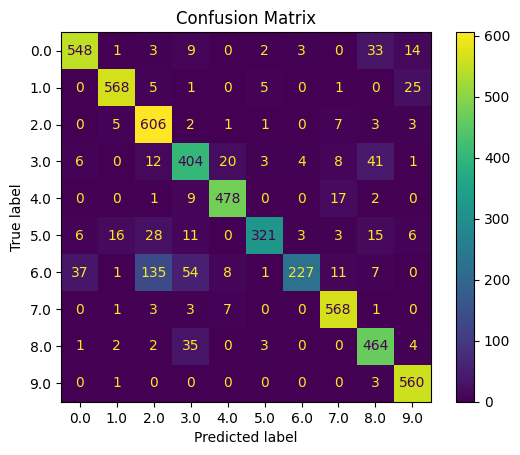

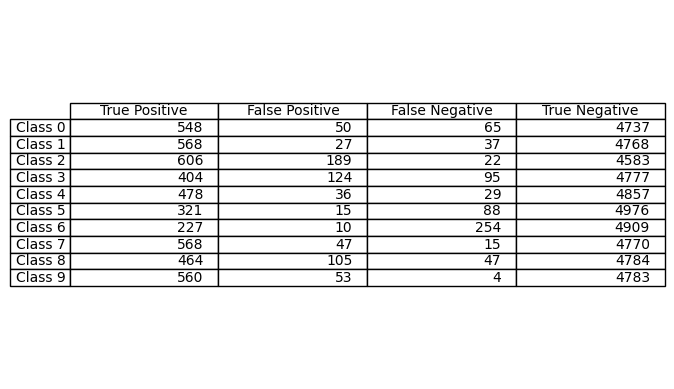

In [7]:
plot_confusion_matrix(mlp_training_results, x_test_norm, y_test, True)

#### Precision Recall, ROC, and DET Curve

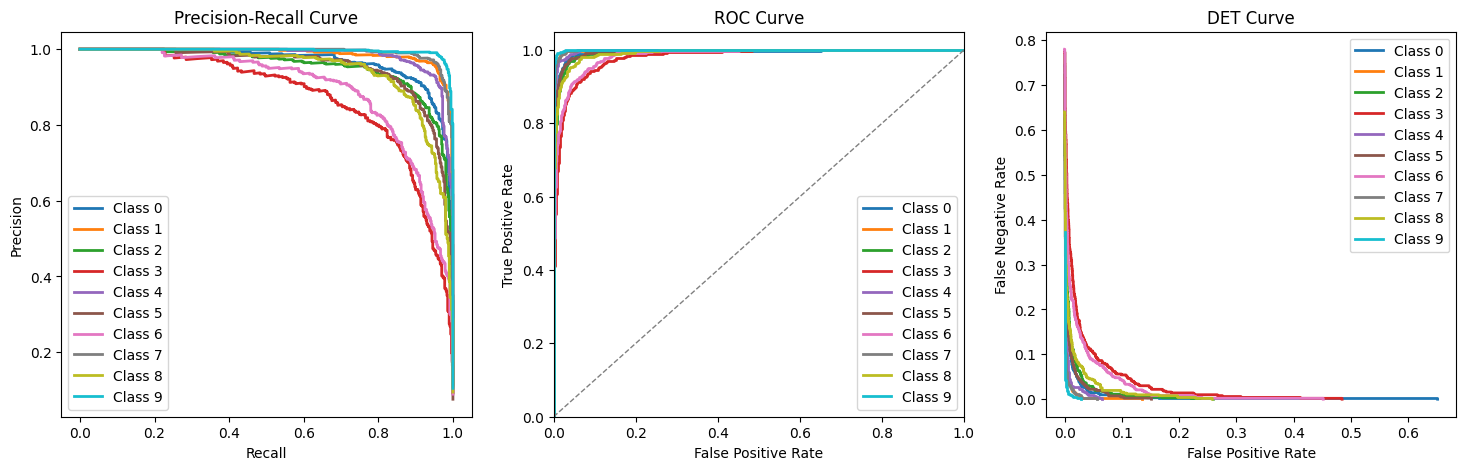

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
y_pred_prob = mlp_training_results.predict_proba(x_test_norm)
plot_precision_recall_curve(y_test, y_pred_prob, axes[0])
plot_roc_curve(y_test, y_pred_prob, axes[1])
plot_det_curve(y_test, y_pred_prob, axes[2])

In [9]:
y_pred = mlp_training_results.predict(x_test_norm)
fetch_accuracy_score(y_test, y_pred)
fetch_log_loss(y_test, y_pred_prob)

Accuracy: 0.8785185185185185
Log Loss: 0.3589391488135932


---
## Hypothesis Testing 

In [11]:
# x_train_norm, x_test_norm = normalise_min_max_task_3(x_train, x_test)
x_train_norm_m, x_test_norm_m = normalise_min_max(x_train, x_test)
mlp_task3_scores = cross_val_score(mlp_training_results, x_test_norm, y_test)
mlp_task2 = load_model("models/task2/mlp_results")
mlp_task2_scores = cross_val_score(mlp_task2, x_test_norm_m, y_test)

t_statistic, p_value = ttest_ind(mlp_task2_scores, mlp_task3_scores)
confidence = 100 * (1 - p_value)
print(f"t-statistic - {t_statistic}")
print(f"p-value - {p_value}")
print(f"Confidence - {confidence}")

if confidence >= 95:
    print("Null hypothesis rejected!")
else:
    print("Failed to reject null hypothesis")

t-statistic - 4.3360587702056534
p-value - 0.0024915689812400536
Confidence - 99.750843101876
Null hypothesis rejected!


<span style="font-style:italic;color:aqua">Anything higher than 95% confidence is not good enough, which means the Task 2 and Task 3 models are not similar and a difference in the performance can be seen -> NULL HYPOTHESIS REJECTED</span>

<span style="font-weight:bold;">Markdown Question: What was the hypothesis you rejected in this task? How does p-value affect your decision?
(150 words)</span>

<span style="font-weight: bold; color: blue">Answer:</span> The hypothesis rejected is the null hypothesis, which states that no significant difference exists between the performance of models trained with original and rescaled features in tasks 3.2 and 3.3. The p-value provides a significance level for comparing the alternative hypothesis against the null hypothesis, which are the models after and before rescaling, respectively. The p-value obtained (0.0024915689812400536) in this instance is lower than 0.05, which was the decided significance level (alpha), indicating strong evidence against the null hypothesis. Hence, the null hypothesis was rejected and concluded that there is a statistically significant difference in the performance of the models. If the p-value is over the benchmark, it concludes that there is not enough evidence to reject the null hypothesis.

In [41]:
test_array = np.array([0, 1, 2, "", np.nan])
print(type(test_array))

<class 'numpy.ndarray'>
